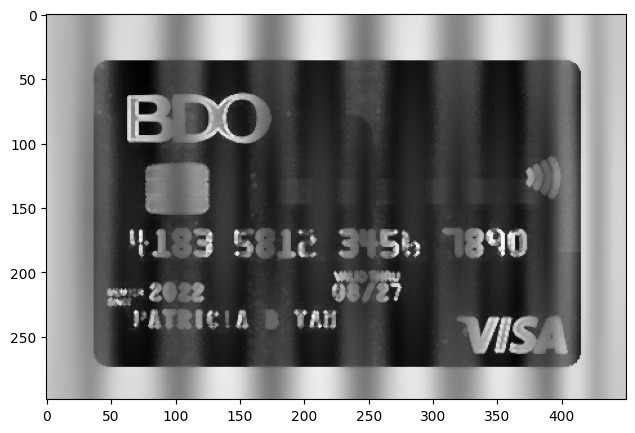

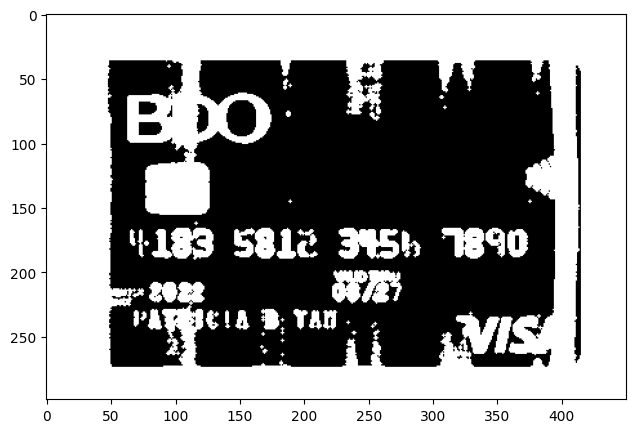

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def pattern_fix_inFreqDomain(img):
    # Convert to grayscale if the image has 3 channels
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Perform Fourier transform
    ft_img = np.fft.fft2(img)
    centered_ft_img = np.fft.fftshift(ft_img)  # Shift zero frequency component to the center
    magnitude_spectrum = np.log(np.abs(centered_ft_img) + 1)
    
    height, width = img.shape
    crow, ccol = height // 2, width // 2
    
    # Create a mask with the same dimensions as the image
    mask = np.ones((height, width), np.uint8)
    mask[crow-1:crow+1, ccol+5:ccol+16] = 0  # Smaller frequency region
    mask[crow-1:crow+1, ccol-16:ccol-5] = 0  # Smaller frequency region

    # Apply mask to the centered FT image
    f_shift_masked = centered_ft_img * mask
    Unshifted_image = np.fft.ifftshift(f_shift_masked)
    image_restored = np.fft.ifft2(Unshifted_image).real
    visualization_img = np.abs(image_restored)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

    # Apply dilation to fill regions
    visualization_img = cv2.dilate(visualization_img, kernel, iterations=1)

    # Optional: Apply erosion to refine the filled regions
    eroded_image = cv2.erode(visualization_img, kernel, iterations=1)
    return visualization_img, magnitude_spectrum

def IS_High_Frequency(img):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    f_transform = np.fft.fft2(img)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = np.abs(f_shift)
    frequency = np.sum(magnitude_spectrum) / (img.shape[0] * img.shape[1])
    print(frequency)
    return frequency > 3200

def QR_Print_BA(final_img):
    plt.figure(figsize=(10, 5))
    plt.imshow(final_img, cmap='gray')
    plt.show()

def Threshold_img(img):
    mean_intensity = np.mean(img)
    std_dev = np.std(img)
    threshold_value = mean_intensity + (std_dev * 0.01)
    thresholded_image = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)[1]
    return thresholded_image

# Load the image
image = cv2.imread("12 - weewooweewoo.jpg")

image,_=pattern_fix_inFreqDomain(image)
QR_Print_BA(image)

image=cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)[1]
 
QR_Print_BA(image)
